# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

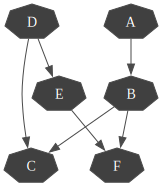

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.285062 , 0.714938] , [0.281826 , 0.718174]]

B:Range([0,1])
<A:0> : [[0.589007 , 0.410993] , [0.588984 , 0.411016]]
<A:1> : [[0.4562 , 0.5438] , [0.456026 , 0.543974]]

C:Range([0,1])
<B:0|D:0> : [[0.724649 , 0.275351] , [0.724646 , 0.275354]]
<B:1|D:0> : [[0.444636 , 0.555364] , [0.444426 , 0.555574]]
<B:0|D:1> : [[0.707312 , 0.292688] , [0.707308 , 0.292692]]
<B:1|D:1> : [[0.776006 , 0.223994] , [0.776004 , 0.223996]]

D:Range([0,1])
<> : [[0.204289 , 0.795711] , [0.0853591 , 0.914641]]

E:Range([0,1])
<D:0> : [[0.250058 , 0.749942] , [0.243647 , 0.756353]]
<D:1> : [[0.533464 , 0.466536] , [0.533411 , 0.466589]]

F:Range([0,1])
<E:0|B:0> : [[0.433832 , 0.566168] , [0.433583 , 0.566417]]
<E:1|B:0> : [[0.288479 , 0.711521] , [0.285443 , 0.714557]]
<E:0|B:1> : [[0.430386 , 0.569614] , [0.430122 , 0.569878]]
<E:1|B:1> : [[0.182388 , 0.817612] , [0.135735 , 0.864265]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()